In [219]:
import numpy as np
import matplotlib.pyplot as plt
import math

[[2 3 3 4]
 [6 4 8 6]]
[[ 3  1  3  5]
 [ 0 -2 -4 -2]]


(2, 4)

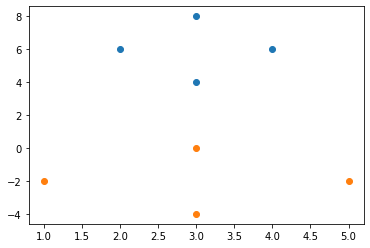

In [220]:
x1_w1 = np.array([2,3,3,4])
x2_w1 = np.array([6,4,8,6])
plt.scatter(x1_w1,x2_w1);
x1_w2 = np.array([3,1,3,5])
x2_w2 = np.array([0,-2,-4,-2])
X1 = np.stack((x1_w1,x2_w1),axis=0)
X2 = np.stack((x1_w2,x2_w2),axis=0)
plt.scatter(x1_w2,x2_w2);
print(X1)
print(X2)
X1.shape

In [221]:
m1_w1 = np.mean(x1_w1) 
m2_w1 = np.mean(x2_w1)
m1 = np.array([m1_w1,m2_w1])

m1_w2 = np.mean(x1_w2) 
m2_w2 = np.mean(x2_w2)
m2 = np.array([m1_w2,m2_w2])


In [222]:
# find out covariance with respect  columns 
cov_mat = np.stack((x1_w1, x2_w1), axis = 0)  
cov_mat1 = np.cov(cov_mat)
print(cov_mat1) 
cov_mat = np.stack((x1_w2, x2_w2), axis = 0)  
cov_mat2 = np.cov(cov_mat)
print(cov_mat2) 

[[0.66666667 0.        ]
 [0.         2.66666667]]
[[2.66666667 0.        ]
 [0.         2.66666667]]


In [223]:
p_w1 = 0.5
p_w2 = 0.5

cov_mat1_inv = np.linalg.inv(cov_mat1)
cov_mat2_inv = np.linalg.inv(cov_mat2)

def a_mat(cov_matinv):
    return (-0.5)*cov_matinv

def b_mat(mean_mat,cov_matinv):
    return np.dot(mean_mat.T,cov_matinv)

def CIO(mean_mat,cov_matinv,p_w):
    x = (-0.5)*np.dot(np.dot((-0.5)*mean_mat.T,cov_matinv),mean_mat)
    y = (-0.5)*np.log(np.linalg.det(cov_matinv))
    z = np.log(p_w)
    return x+y+z
# print(ai(0))
a_w1 = a_mat(cov_mat1_inv)
print(a_w1.shape)
a_w2 = a_mat(cov_mat2_inv)
b_w1 = b_mat(m1,cov_mat1_inv)
print(b_w1.shape)
b_w2 = b_mat(m2,cov_mat2_inv)
cio_w1 = CIO(m1,cov_mat1_inv,p_w1)
print(cio_w1.shape)
cio_w2 = CIO(m2,cov_mat2_inv,p_w2)

(2, 2)
(2,)
()


In [229]:
def discriminator(A,B,cio,X):
    x = (-0.5)*np.dot(np.dot(X.T,A),X)
    y = np.dot(B,X)
    z = cio
    return x+y+z
x_test = np.array([[5],[-2]])
g1 = discriminator(a_w1,b_w1,cio_w1,x_test)
print(g1)
g2 = discriminator(a_w2,b_w2,cio_w2,x_test)
print(g2)

[[34.09453489]]
[[11.35018207]]
